<a href="https://colab.research.google.com/github/Nikhil5566/Machine-Learning/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
df = pd.read_csv('ML_data.csv')

In [ ]:
df.head(11)

,Country,Age,Salary,Purchaged
0,France,44.0,72000.0,no
1,Spain,27.0,48000.0,yes
2,Germany,30.0,54000.0,no
3,Spain,38.0,61000.0,no
4,Germany,40.0,NaN,yes
5,France,35.0,58000.0,yes
6,Spain,NaN,52000.0,no
7,France,48.0,79303.0,yes
8,Germany,50.0,83000.0,no
9,France,37.0,87000.0,yes


In [ ]:
duplicate = df.duplicated().sum()
duplicate

np.int64(0)

In [ ]:
missing_values = df.isnull().sum()
missing_values

,0
Country,0
Age,1
Salary,1
Purchaged,0


In [ ]:
df['Age'] = df['Age'].fillna(30)

In [ ]:
df['Salary'] = df['Salary'].fillna(41000)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        10 non-null     float64
 2   Salary     10 non-null     float64
 3   Purchaged  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


In [ ]:
df.describe()

,Age,Salary
count,10.000000,10.000000
mean,37.900000,63530.300000
std,7.766738,15846.400321
min,27.000000,41000.000000
25%,31.250000,52500.000000
50%,37.500000,59500.000000
75%,43.000000,77477.250000
max,50.000000,87000.000000


# ML

In [ ]:
df = pd.read_csv('ML_data.csv')
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [ ]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79303.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 87000.0]]


In [ ]:
print(Y)

['no' 'yes' 'no' 'no' 'yes' 'yes' 'no' 'yes' 'no' 'yes']


### Taking care of missing values: [ with ML ]

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [ ]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 66033.66666666667]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79303.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 87000.0]]


# **Encoding Categorical data**

In [ ]:
# Encoding the independent variable:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 66033.66666666667]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79303.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 87000.0]]


In [ ]:
# Encoding the Dependency variable;

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit_transform(Y)
y = le.fit_transform(Y)


In [ ]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


# **Spliting the dataset into the training set and Test set.**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
print(X_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 66033.66666666667]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79303.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [ ]:
print(X_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 87000.0]]


In [ ]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [ ]:
print(y_test)

[0 1]


# **Feature Scaling**

In [ ]:
# Standardisation (google the formula)
# Normalisation (google the formula)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:]) # [:, 3:] => Taking column Age and Salary
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [ ]:
print(X_train)

[[0.0 0.0 1.0 -0.19159184384578545 -1.1007776560031066]
 [0.0 1.0 0.0 -0.014117293757057777 0.09515383253950294]
 [1.0 0.0 0.0 0.566708506533324 0.6035972831326989]
 [0.0 0.0 1.0 -0.30453019390224867 -0.3338089333919941]
 [0.0 0.0 1.0 -1.9018011447007988 -1.4416526438302677]
 [1.0 0.0 0.0 1.1475343068237058 1.2259497921581382]
 [0.0 1.0 0.0 1.4379472069688968 1.5410034996573918]
 [1.0 0.0 0.0 -0.7401495441200351 -0.5894651742623649]]


In [ ]:
print(X_test)

[[0.0 1.0 0.0 -1.4661817944830124 -0.930340162089526]
 [1.0 0.0 0.0 -0.44973664397484414 1.8818784874845529]]


# **Regression**

video - 40

Regression models (both linear and non-linear) are used for predicting a real value, like salary for example. If your independent variable is time, then you are forecasting future values, otherwise your model is predicting present but unknown values. Regression technique vary from Linear Regression to SVR and Random Forests Regression.

In this part, you will understand and learn how to implement the following Machine Learning Regression models:

Simple Linear Regression

Multiple Linear Regression

Polynomial Regression

Support Vector for Regression (SVR)

Decision Tree Regression

Random Forest Regression

# **Simple Linear Regression**


Ordinary Least Squares: It is the best possible line from where the data points have to travel the shortest to the regression line.

Importing Dataset

In [ ]:
df = pd.read_csv('Salary_Data.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

Splitting the dataset into the Training set the test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Training the Simple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Predicting the test set results

In [ ]:
y_pred = regressor.predict(X_test)

Visualising the training set result

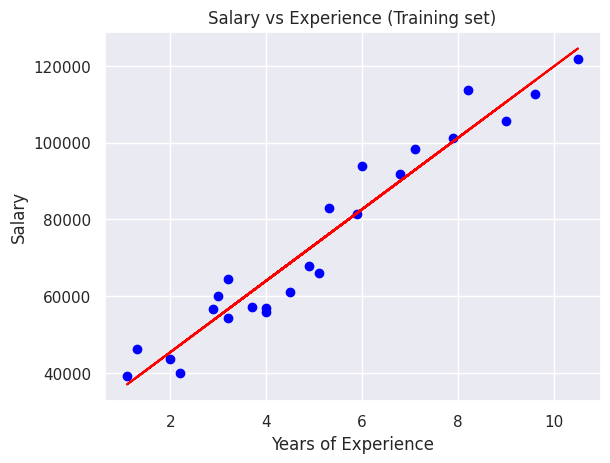

In [ ]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

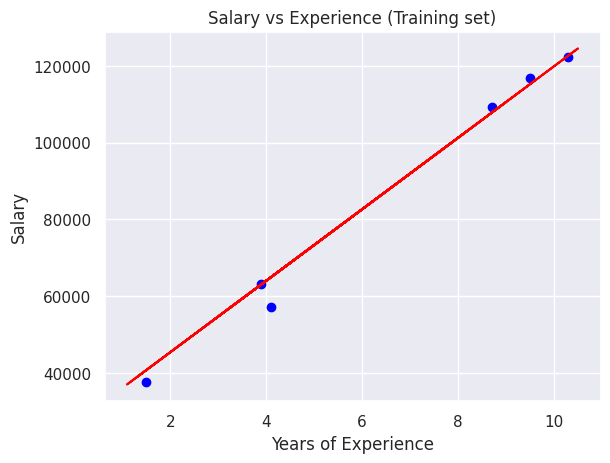

In [ ]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Multiple Linear Regression

1. Linearity -------> [ Linear relationship between Y and each X ]
2. Homoscedasticity -------> [ Equal Variance ]
3. Multivariate Normality -------> [ Normality of error distribution ]
4. Independence -------> [ Of observations. Include ' no autocorrelation ' ]
5. Lack Of Multicollinearit -------> [ Predictor are not correlated with each other ]
6. The Outlier Check -------> [ This is not assumption, but an 'extra' ]


---------> I have saved an image for this as a representaion <---------

# Building A MODEL ( Step-by-Step)

5 Methods of Building Models:

1. All-in
2. Backward Elimination
3. Forward Selection
4. Bidirection Elimination
5. Score Comparison

*** 2, 3, 4 are also called Stepwise Regression ***

1. All in:
- Prior knowledge, OR
- You have to, OR
- Preparing for backward Elimination.

2. Backward elimination:
- STEP - 1 select a significance level to stay in the model. ( e.g SL = 0.05)
- STEP - 2 Fit the full model with all possible predictors
- STEP - 3 Consider the predictor with the highest P-value. If P > SL go to STEP-4, otherwise go to FIN
- STEP - 4 Remove the Predictor
- STEP - 5 Fit model without this variable.

3. Forward Selection:
- STEP - 1 select a significance level to enter the model ( e.g SL = 0.05 )
- STEP - 2 Fit all simple regression models. Y ~ x^n Select the one with the lowest P-values.
- STEP - 3 Keep this variable and fit all possible models with one extra predictor added to the one(s) you already have
- STEP - 4 Consider the predictor with the lowest P-values. If P < SL, go to STEP-3, otherwise go to FIN.

4. Bidirectional Elimination:
- STEP - 1 select a significance level to enter and to stay in the model eg. SLENTER = 0.05, SLSTAY = 0.05
- STEP - 2 preform the next step of Forward Selection (new varibale must have: P < SLENTER to enter)
- STEP - 3 perform ALL steps of Backward Elinination ( old varibale must have P < SLSTAY to stay)
- STEP - 4 No new variable can enter and no old variable can exit.

5. Score Comparison:
- STEP - 1 select a criterion of goodness of fit (eg. Akaike criterion)
- STEP - 2 construct all possible regression models: 2^N-1 total combinations.
- STEP - 3 select the one with the best criterion

# Multi Linear Regression Example:

Steps for model training:

1. Importing the libraries
2. Importing the dataset
3. Encoding categorical data
4. Splitting the dataset into the training and test set
5. Training the multiple Linear Rgression model on the training set
6. Predicting the test set results

# 1. Importing the libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2. Importing the dataset

In [ ]:
df = pd.read_csv('50_Startups.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

# 3. Encoding the dataset

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
# [3] = State column
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

# 4. Splitting the dataset into the Training set and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# 5. Training the multiple Linear Rgression model on the training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# Predicting the Text set results

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


# Polynomial Regression:



1. Simple Regression
2. Multiple Regression
3. Polynomial Regression

# Importing the libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the dataset

In [15]:
df = pd.read_csv('Position_Salaries.csv', encoding='latin-1')
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

# Training the linear Regression model on the whole dataset (Simple Linear Regression)

In [16]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

# Training the polynomial Regression model on the whole dataset

In [35]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

# Visualization the linear Regression result

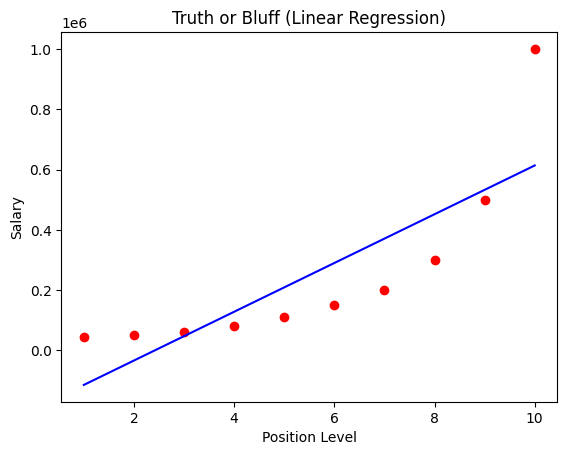

In [24]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')

plt.show()

# Visualising the polynomial regression result

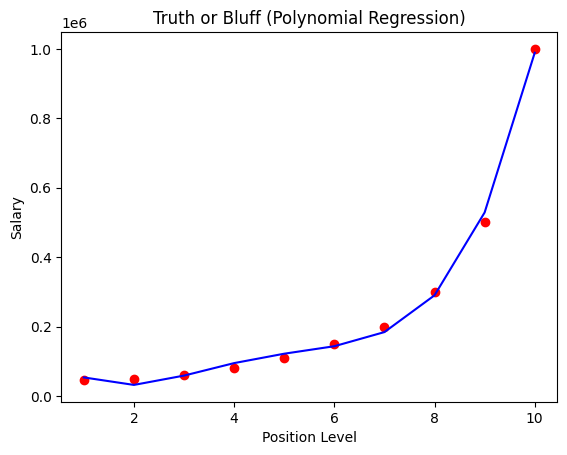

In [36]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')

plt.show()

# Visualising the polynomial regression result ( for higher resolution and smoother curve ) (WILL COME LATER IN THE FUTURE)

<ipython-input-37-383f0ab53e0c>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


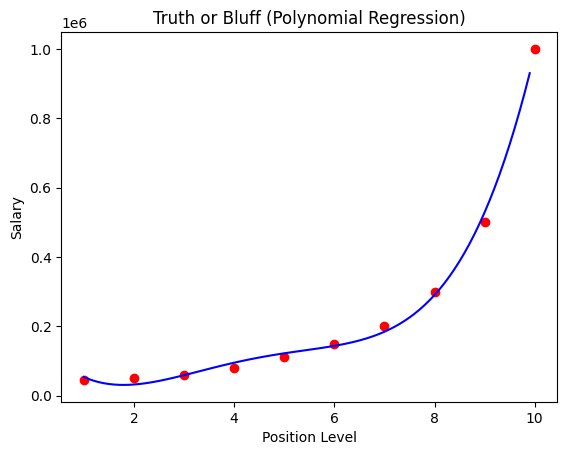

In [37]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')

plt.show()

# Predicting a new result with linear regression

In [41]:
lin_reg.predict([[6.5]])

array([330378.78787879])

# Predicting a new result Polynomial regression

In [45]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])